## Dependancies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

####
- Part 1: Prepare the Data
- Part 2: Apply Dimensionality Reduction
- Part 3: Perform a Cluster Analysis with K-means
- Part 4: Make a Recommendation

## Part 1: Prepare the Data

### Import CSV

In [2]:
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_df.shape

(618, 15)

In [4]:
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [5]:
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [6]:
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


### Drop "MYOPIC" column from dataset

In [7]:
myopia_new=myopia_df.drop(["MYOPIC"], axis='columns')
labels=myopia_df["MYOPIC"]

In [8]:
myopia_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


### Standardise dataset

In [9]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(myopia_new)

In [10]:
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Part 2: Apply Dimensionality Reduction

In [11]:
pca = PCA(n_components=0.99)
myopia_pca = pca.fit_transform(myopia_new)

In [12]:
pca.explained_variance_ratio_.sum()

0.9940432360184247

In [13]:
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(myopia_pca)

/Users/missshola/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [14]:
myopia_pca.shape

(618, 5)

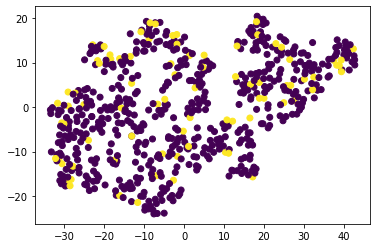

In [15]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=labels)

#### Are there distinct clusters?

## Part 3: Perform a Cluster Analysis with K-means

In [16]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

In [17]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,232613.178979
1,2,124818.615692
2,3,91719.083001
3,4,76837.937707
4,5,65876.947547


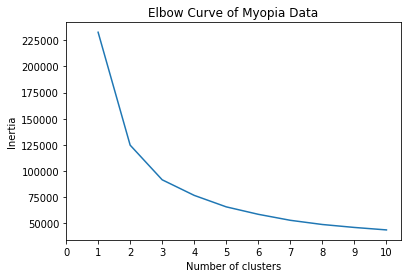

In [18]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve of Myopia Data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
model = KMeans(n_clusters=3, random_state=0)

model.fit(myopia_pca)

predictions = model.predict(myopia_pca)

myopia_pca["class"] = model.labels_
myopia_pca.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.scatter(myopia_pca['1'], myopia_pca['2'], c=myopia_pca['class'])
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('Myopia Clusters')
plt.show()

## Part 4: Make a Recommendation